# Features
Création de nouvelles features pour chaque document pour aider le modèle.
* Nombre de mots
* Longueur moyenne des phrases 
* Richesse du vocabulaire
* Comptage des consonnes doublées
* Comptage du nombre de contractions

In [1]:
from utils import load_data
from sklearn.preprocessing import normalize, KBinsDiscretizer
from statistics import mean
import matplotlib.pyplot as plt
import re

In [2]:
# Chargement des données
df = load_data("../data/train.txt")
X = df["text"]

# Nombre de mots

In [3]:
X[0]

' IThe importance and popularity of travelling is still raising , Everybody is interested in getting to know other countries and continents but the ways how to do it , are very differently . I agree with the statement that it is the best way to travel in a group led by a tour guide . If you travel in a group and you have a tour guide you get to know the most famous places and you get to know interesting things about the country you decided to visit . The tour guide would organise everything for you , so the only thing you would have to do is to go to the appointments with the group . Another aspect is that you would get to know a lot of interesting people . When you travel in a group it is very easy to get to know other people because usually you sit in the same bus or you sleep in the same hotel like the others do . That is why you are never borring when you travel in groups . If you decide to travel in a group and you visit a country which is dangerouses then the tour guide can infor

In [4]:
[w for w in re.split(r"[ .,:!?']", X[0]) if w != '']

['IThe',
 'importance',
 'and',
 'popularity',
 'of',
 'travelling',
 'is',
 'still',
 'raising',
 'Everybody',
 'is',
 'interested',
 'in',
 'getting',
 'to',
 'know',
 'other',
 'countries',
 'and',
 'continents',
 'but',
 'the',
 'ways',
 'how',
 'to',
 'do',
 'it',
 'are',
 'very',
 'differently',
 'I',
 'agree',
 'with',
 'the',
 'statement',
 'that',
 'it',
 'is',
 'the',
 'best',
 'way',
 'to',
 'travel',
 'in',
 'a',
 'group',
 'led',
 'by',
 'a',
 'tour',
 'guide',
 'If',
 'you',
 'travel',
 'in',
 'a',
 'group',
 'and',
 'you',
 'have',
 'a',
 'tour',
 'guide',
 'you',
 'get',
 'to',
 'know',
 'the',
 'most',
 'famous',
 'places',
 'and',
 'you',
 'get',
 'to',
 'know',
 'interesting',
 'things',
 'about',
 'the',
 'country',
 'you',
 'decided',
 'to',
 'visit',
 'The',
 'tour',
 'guide',
 'would',
 'organise',
 'everything',
 'for',
 'you',
 'so',
 'the',
 'only',
 'thing',
 'you',
 'would',
 'have',
 'to',
 'do',
 'is',
 'to',
 'go',
 'to',
 'the',
 'appointments',
 'with',

In [5]:
def count_words(doc: str) -> int:
    return len([w for w in re.split(r"[ .,:!?']", doc) if w != ''])

In [6]:
t = X.apply(count_words).to_numpy().reshape(-1, 1)
t

array([[321],
       [361],
       [361],
       ...,
       [328],
       [497],
       [288]])

In [7]:
# Il faut normaliser les features issues d'un comptage
normalize(t, axis=0, norm='max')

array([[0.40175219],
       [0.45181477],
       [0.45181477],
       ...,
       [0.41051314],
       [0.62202753],
       [0.36045056]])

In [8]:
# Discrétisation sous forme de vecteurs one-hot
kbins = KBinsDiscretizer(n_bins=5, encode='onehot', strategy='uniform')
kbins.fit_transform(t).toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.]])

# Longueur moyenne des phrases
En moyenne sur le corpus une phrase fait 125 caractères pour 21 mots. Les distributions sont équivalentes c'est juste l'échelle qui change. Donc il faut choisir l'une des deux features.

In [9]:
# En nombre de caractères
def mean_chars_sentence(doc: str) -> float:
    sentences = re.split(r'[.!?]+', doc)
    if sentences[-1] == '':
        sentences.pop(-1)
    return mean([len(s) for s in sentences])

mean_chars_sentence(X[0])

125.92307692307692

In [10]:
X.apply(mean_chars_sentence).mean()

121.27387091426746

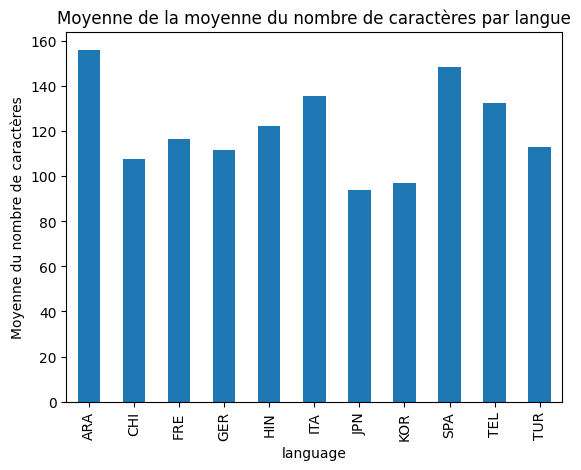

In [11]:
df["count_chars"] = df["text"].apply(mean_chars_sentence)
df.groupby(df["language"])["count_chars"].mean().plot(
    kind='bar', title='Moyenne de la moyenne du nombre de caractères par langue', 
    ylabel='Moyenne du nombre de caractères')
plt.show()

In [12]:
# En nombre de mots
def mean_words_sentence(doc: str) -> float:
    count_words = []
    sentences = re.split(r'[.!?]+', doc)
    if sentences[-1] == '':
            sentences.pop(-1)
    for snt in sentences:
        words = re.split(r"[ ,':]", snt)
        count_words.append(len([w for w in words if w != '']))
    return mean(count_words)

mean_words_sentence(X[0])

24.692307692307693

In [13]:
X.apply(mean_words_sentence).mean()

21.813762400684706

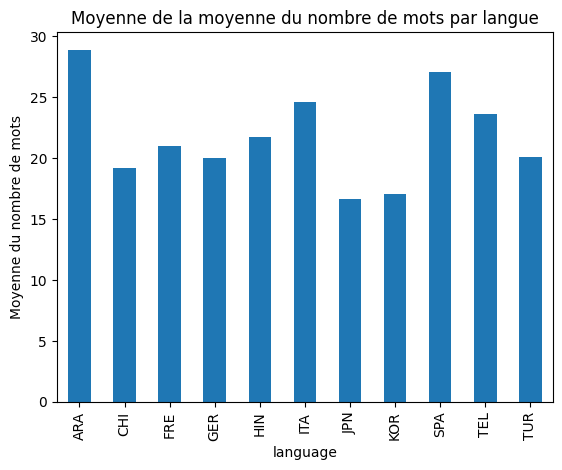

In [14]:
df["count_words"] = df["text"].apply(mean_words_sentence)
df.groupby(df["language"])["count_words"].mean().plot(
    kind='bar', title='Moyenne de la moyenne du nombre de mots par langue', 
    ylabel='Moyenne du nombre de mots')
plt.show()

# Richesse du vocabulaire
Le taux de richesse moyenne du corpus s'élève à 0.49. En nombre de mots différents la moyenne s'affiche à 157 mots. Quand on regarde la distribution du taux de richesse on s'aperçoit clairement que toutes les langues sont au même niveau. Ce n'est pas un bon indicateur a priori. Il vaut mieux compter le nombre de mots différents dans chaque document pour que la distribution soit intéressante.

In [15]:
def lexical_richness_rate(doc: str) -> float:
    tokens = [w for w in re.split(r"[ .,:!?']", doc) if w != '']
    n_types = len(set(tokens))
    n_tokens = len(tokens)
    return n_types / n_tokens

lexical_richness_rate(X[0])

0.3956386292834891

In [16]:
X.apply(lexical_richness_rate).mean()

0.4987096789867153

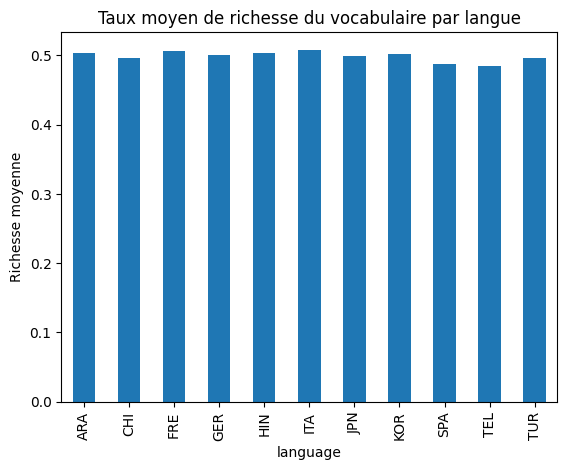

In [17]:
df["richness"] = df["text"].apply(lexical_richness_rate)
df.groupby(df["language"])["richness"].mean().plot(
    kind='bar', title='Taux moyen de richesse du vocabulaire par langue', 
    ylabel='Richesse moyenne')
plt.show()

In [18]:
def lexical_richness(doc: str) -> int:
    tokens = [w for w in re.split(r"[ .,:!?']", doc) if w != '']
    n_types = len(set(tokens))
    return n_types

lexical_richness(X[0])

127

In [19]:
X.apply(lexical_richness).mean()

156.98171717171718

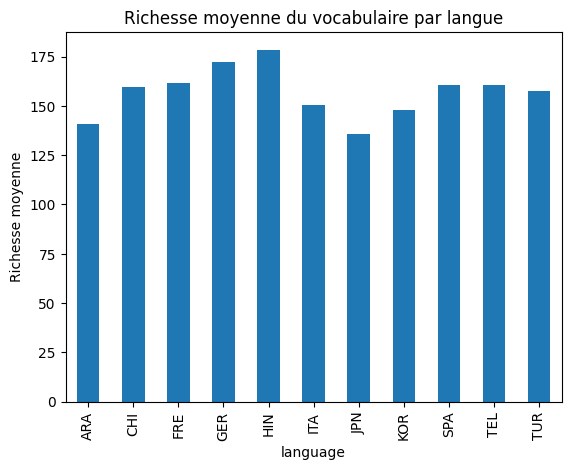

In [20]:
df["richness"] = df["text"].apply(lexical_richness)
df.groupby(df["language"])["richness"].mean().plot(
    kind='bar', title='Richesse moyenne du vocabulaire par langue', 
    ylabel='Richesse moyenne')
plt.show()

# Nombre de consonnes doublées
En moyenne un document comporte 19 consonnes doublées. La distribution par langue n'est pas forcément très marquée. Etonamment elle est équivalente à celle de la richesse du vocabulaire avec une échelle différente.

In [21]:
def count_double_consonant(doc: str) -> int:
    consonant = list('abcdfghjklmnpqrstvwxyz')
    regex = '|'.join([c+c for c in consonant])
    #return sum([len(re.findall(regex, w)) for w in re.split(r"[ .,:!?']", doc) if w != ''])
    return len(re.findall(regex, doc))

count_double_consonant(X[0])

10

In [22]:
X.apply(count_double_consonant).mean()

19.236464646464647

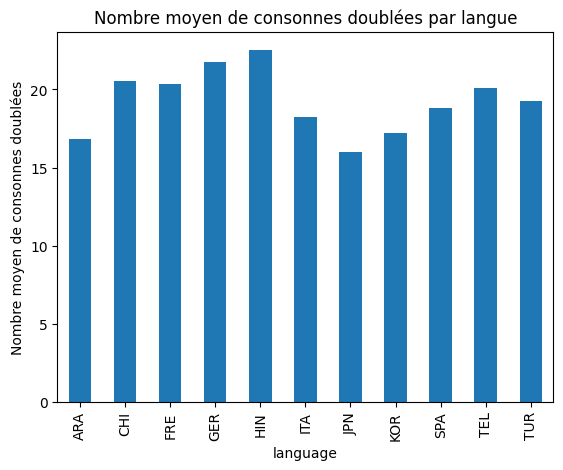

In [23]:
df["consonant"] = df["text"].apply(count_double_consonant)
df.groupby(df["language"])["consonant"].mean().plot(
    kind='bar', title='Nombre moyen de consonnes doublées par langue', 
    ylabel='Nombre moyen de consonnes doublées')
plt.show()

# Nombre de contractions
Cette feature a une moyenne de 1.72 dans le dataset. Il y a beaucoup de documents qui ne font aucune contraction.
Cela ne veut pas dire que c'est une feature inintéressante. Peut-être que c'est une anomalie qui permet de bien caractériser certaines étiquettes comme le montre la distribution ?

In [24]:
def count_contractions(doc: str) -> int:
    regex = r"['’][ ]*(m|re|s|ve|ll|d|t)"
    return len(re.findall(regex, doc))

count_contractions(X[0])

0

In [25]:
X.apply(count_contractions).mean()

1.7245454545454546

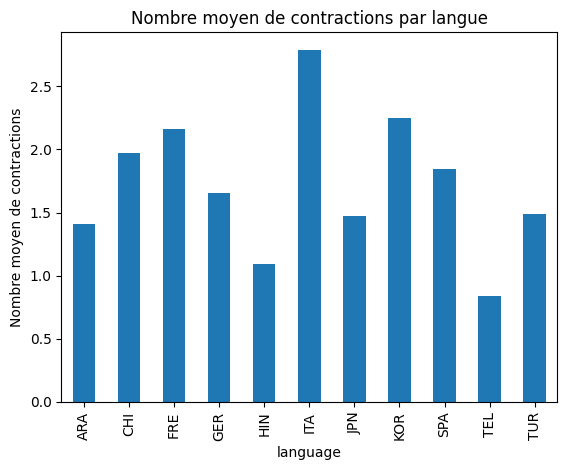

In [26]:
df["contractions"] = df["text"].apply(count_contractions)
df.groupby(df["language"])["contractions"].mean().plot(
    kind='bar', title='Nombre moyen de contractions par langue', 
    ylabel='Nombre moyen de contractions')
plt.show()